In [2]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy import stats 
from statsmodels.stats import diagnostic

In [4]:
data=pd.read_hdf("model1.h5")
data.head(10)

,date,separator_speed_rpm_pv,mill_dp_mbar_pv,separator_pwr_kw_pv
0,2019-05-10 11:24:00.000,717.51,29.79,60.41
1,2019-05-10 11:24:30.000,735.89,30.51,55.76
2,2019-05-10 11:25:00.000,736.68,31.61,55.89
3,2019-05-10 11:25:30.000,747.61,33.71,56.06
4,2019-05-10 11:26:00.000,747.61,34.68,55.64
5,2019-05-10 11:26:30.000,747.56,34.71,55.44
6,2019-05-10 11:27:00.000,746.93,35.22,55.51
7,2019-05-10 11:27:30.000,747.83,34.91,55.56
8,2019-05-10 11:28:00.000,747.19,35.49,55.98
9,2019-05-10 11:30:00.000,747.98,28.19,55.82


In [5]:
train_perc = 0.8
test_split = 0.2
 
train_split = int(len(data) * train_perc)
train_data = data[:train_split]
test_split = int(len(data) * test_split)
test_data = data[train_split:(train_split+test_split+1)]

In [6]:
train_data.describe()

,separator_speed_rpm_pv,mill_dp_mbar_pv,separator_pwr_kw_pv
count,151617.000000,151617.000000,151617.000000
mean,763.356838,35.064559,57.937752
std,55.780296,3.259489,2.534740
min,21.070000,1.110000,1.060000
25%,747.190000,32.970000,56.710000
50%,769.160000,34.830000,57.680000
75%,789.600000,36.960000,58.870000
max,1690.000000,65.930000,162.000000


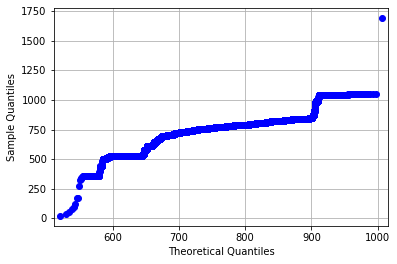

In [7]:
ss = train_data["separator_speed_rpm_pv"]  
a=np.mean(ss)
b=np.std(ss)
qqplot(ss , loc = a, scale = b)
plt.grid()
pyplot.show()

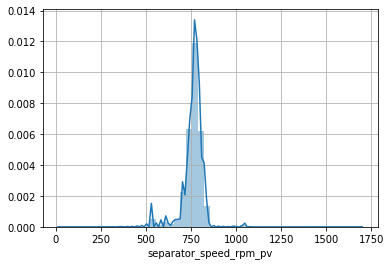

In [8]:
sns.distplot(ss)
plt.grid()

In [9]:
train_data['separator_speed_rpm_pv'].describe(percentiles=[.90, .95, .97, .98, .99, .995, .997, .998, .999, .9995, .9996, .9997, .9998, .9999])

count     151617.000000
mean         763.356838
std           55.780296
min           21.070000
50%          769.160000
90%          812.630000
95%          823.720000
97%          830.640000
98%          836.600000
99%          840.510000
99.5%        988.970000
99.7%       1042.470000
99.8%       1043.668400
99.9%       1044.310000
99.95%      1045.950000
99.96%      1046.000000
99.97%      1046.160000
99.98%      1046.320000
99.99%      1046.530000
max         1690.000000
Name: separator_speed_rpm_pv, dtype: float64

  The rule of thumb seems to be:

1.If the skewness is between -0.5 and 0.5, the data are fairly symmetrical 

2.If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed 

3.If the skewness is less than -1 or greater than 1, the data are highly skewed


The kurtosis of any univariate normal distribution is 3. It is common to compare the kurtosis of a distribution to this value. 

Distributions with kurtosis less than 3 are said to be platykurtic

Distributions with kurtosis greater than 3 are said to be leptokurtic.

In [10]:
stats.kstest(ss , "norm")

KstestResult(statistic=1.0, pvalue=0.0)

In [11]:
stats.skew(ss), stats.kurtosis(ss) 

(-1.3757897468053062, 10.300393913847817)

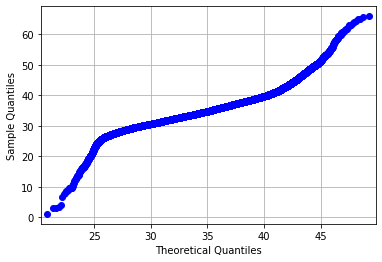

In [12]:
mill = train_data["mill_dp_mbar_pv"]
a=np.mean(mill)
b=np.std(mill)
qqplot(mill,  loc=a, scale = b)
plt.grid()
pyplot.show()


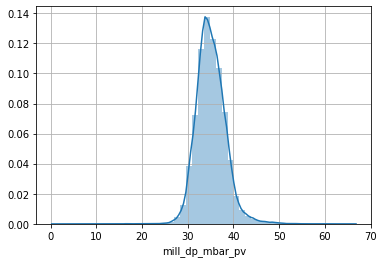

In [13]:
sns.distplot(mill)
plt.grid()

In [14]:
train_data['mill_dp_mbar_pv'].describe(percentiles=[.90, .95, .97, .98, .99, .995, .997, .998, .999, .9995, .9996, .9997, .9998, .9999])

count     151617.000000
mean          35.064559
std            3.259489
min            1.110000
50%           34.830000
90%           38.890000
95%           40.210000
97%           41.395200
98%           42.540000
99%           44.560000
99.5%         46.960000
99.7%         48.610000
99.8%         49.680000
99.9%         52.041520
99.95%        54.599600
99.96%        55.591216
99.97%        57.596976
99.98%        59.401216
99.99%        61.467376
max           65.930000
Name: mill_dp_mbar_pv, dtype: float64

In [15]:
stats.kstest(mill , "norm")

KstestResult(statistic=0.9999670221557517, pvalue=0.0)

In [16]:
stats.skew(mill) 

0.6159044918361385

In [17]:
stats.kurtosis(mill) 

4.38724061827045

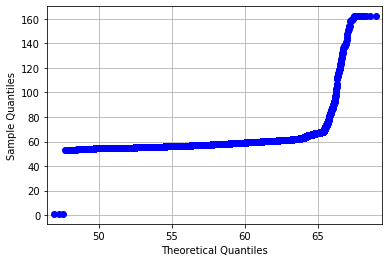

In [18]:
sp = train_data["separator_pwr_kw_pv"]
a=np.mean(sp)
b=np.std(sp)
qqplot(sp,  loc=a, scale = b)

plt.grid()
pyplot.show()

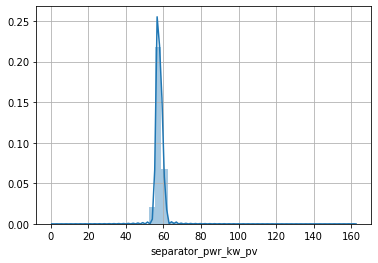

In [19]:
sns.distplot(sp)
plt.grid()

In [20]:
train_data['separator_pwr_kw_pv'].describe(percentiles=[.90, .95, .97, .98, .99, .995, .997, .998, .999, .9995, .9996, .9997, .9998, .9999])

count     151617.000000
mean          57.937752
std            2.534740
min            1.060000
50%           57.680000
90%           59.990000
95%           60.680000
97%           61.160000
98%           61.550000
99%           62.540000
99.5%         65.360000
99.7%         66.730000
99.8%         67.557680
99.9%         77.977680
99.95%       101.341440
99.96%       115.063488
99.97%       125.299168
99.98%       138.438816
99.99%       158.722432
max          162.000000
Name: separator_pwr_kw_pv, dtype: float64

In [21]:
stats.kstest(sp , "norm")

KstestResult(statistic=0.9999802133006194, pvalue=0.0)

In [22]:
stats.skew(sp) , stats.kurtosis(sp)

(17.551285129151932, 601.5306465284258)

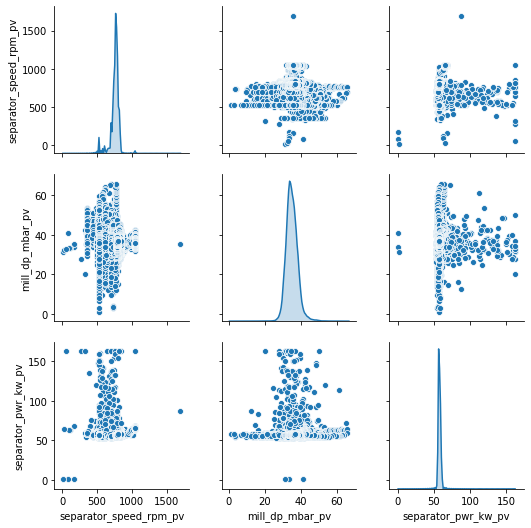

In [26]:
sns.pairplot(train_data,vars=['separator_speed_rpm_pv', 'mill_dp_mbar_pv', 'separator_pwr_kw_pv'] , diag_kind="kde")

Applying the mask that was created from the above analysis

In [27]:
mask2 = (train_data['mill_dp_mbar_pv']>25) & (train_data['mill_dp_mbar_pv']<45) & (train_data['separator_speed_rpm_pv']>600) & (train_data['separator_speed_rpm_pv']<850) & (train_data['separator_pwr_kw_pv']<62)

In [28]:
train_data = train_data[mask2].reset_index(drop=True)

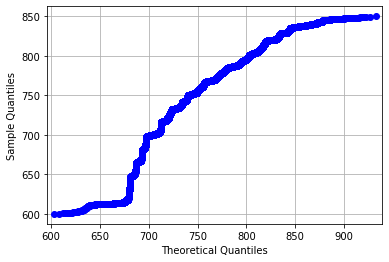

In [29]:
ss = train_data["separator_speed_rpm_pv"]
a=np.mean(ss)
b=np.std(ss)
qqplot(ss,  loc=a, scale = b)
plt.grid()
pyplot.show()

In [30]:
stats.kstest(ss , "norm")

KstestResult(statistic=1.0, pvalue=0.0)

In [31]:
stats.skew(ss) , stats.kurtosis(ss)

(-1.0241695980803167, 2.2789909166287172)

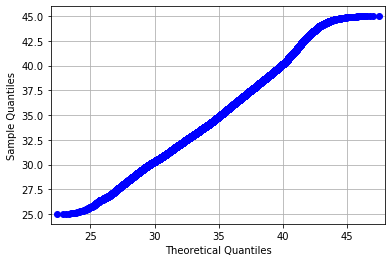

In [32]:
mill = train_data["mill_dp_mbar_pv"]
a=np.mean(mill)
b=np.std(mill)
qqplot(mill,   loc=a, scale = b)
plt.grid()
pyplot.show()

In [33]:
 
stats.skew(mill) , stats.kurtosis(mill) 

(0.2511456244295744, 0.14713330340913577)

In [34]:
stats.kstest(mill , "norm")

KstestResult(statistic=1.0, pvalue=0.0)

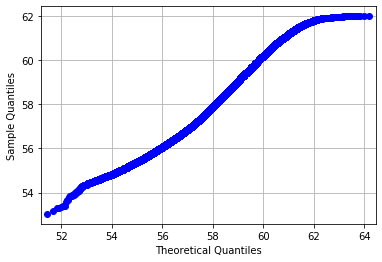

In [35]:
sp = train_data["separator_pwr_kw_pv"]
a=np.mean(sp)
b=np.std(sp)
qqplot(sp,   loc=a, scale = b)
plt.grid()
pyplot.show()

In [36]:
stats.skew(sp) ,stats.kurtosis(sp)

(0.3487601703251907, -0.42732489928185213)

In [37]:
stats.kstest(sp , "norm")

KstestResult(statistic=1.0, pvalue=0.0)

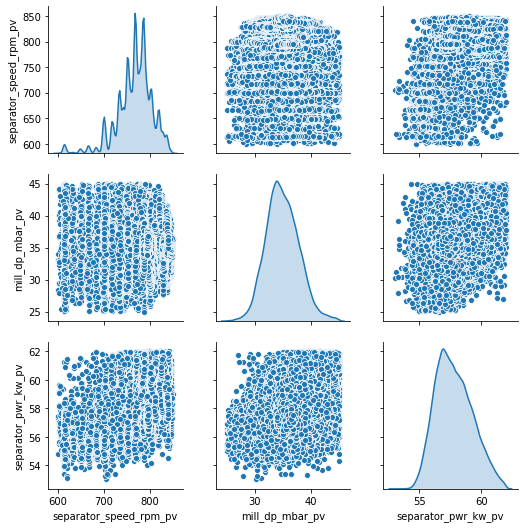

In [38]:
sns.pairplot(train_data,vars=['separator_speed_rpm_pv', 'mill_dp_mbar_pv', 'separator_pwr_kw_pv'] , diag_kind="kde")

# Interpolation

In [47]:
train_data['date'] = pd.to_datetime(train_data['date'], dayfirst=True)
train_data['date'] = train_data['date'].apply(lambda x: x.replace(second=0))
train_data = train_data.groupby(train_data['date']).mean()

linear interpolation

In [48]:
train_datal=train_data.asfreq("1T")
train_datal=train_datal.interpolate(method='linear', axis=0, limit=None, inplace=False, limit_direction='backward', limit_area="inside")
train_datal.describe()

,separator_speed_rpm_pv,mill_dp_mbar_pv,separator_pwr_kw_pv
count,204745.000000,204745.000000,204745.000000
mean,734.674716,33.809911,57.022171
std,47.569738,2.941050,1.312025
min,600.060000,25.020000,53.030000
25%,705.813798,31.738199,56.085808
50%,737.663333,33.630000,56.785000
75%,768.290000,35.576000,57.720000
max,848.620000,44.990000,61.990000


interpolation with 2nd degree polynomial 

In [35]:
train_dataq=train_data.asfreq("1T")
train_dataq=train_dataq.interpolate(method='quadratic', axis=0, limit=None, inplace=False, limit_direction='backward', limit_area="inside")
train_dataq.describe()

,separator_speed_rpm_pv,mill_dp_mbar_pv,separator_pwr_kw_pv
count,204745.000000,204745.000000,204745.000000
mean,523.364389,-1.452319,107.274434
std,3457.071620,200.090436,304.493036
min,-37787.719758,-1386.145347,-454.629484
25%,708.479962,29.114480,55.460000
50%,759.445000,34.410000,57.805000
75%,802.885000,39.615000,62.499330
max,14736.827015,522.380693,2574.443970


interpolation with polynomial 3rd degree

In [36]:
train_datac=train_data.asfreq("1T")
train_datac=train_datac.interpolate(method='cubic', axis=0, limit=None, inplace=False, limit_direction='backward', limit_area="inside")
train_datac.describe()

,separator_speed_rpm_pv,mill_dp_mbar_pv,separator_pwr_kw_pv
count,204745.000000,204745.000000,204745.000000
mean,605.835047,2.154539,111.804638
std,3206.119859,175.793206,301.717814
min,-32643.860010,-1070.075454,-411.442724
25%,705.415000,28.673864,55.470000
50%,759.658349,34.407136,57.875000
75%,803.570000,39.678515,63.604648
max,11645.733904,491.748350,2381.701321


interpolation with polynomial 5th degree

In [37]:
train_datap=train_data.asfreq("1T")
train_datap=train_datap.interpolate(method='polynomial',order=5, axis=0, limit=None, inplace=False, limit_direction='backward', limit_area="inside")
train_datap.describe()

,separator_speed_rpm_pv,mill_dp_mbar_pv,separator_pwr_kw_pv
count,2.047450e+05,2.047450e+05,2.047450e+05
mean,8.109421e+05,4.287606e+04,3.713909e+04
std,4.605945e+06,2.881361e+05,1.787017e+05
min,-9.944290e+06,-3.368045e+05,-2.910150e+05
25%,6.953155e+02,1.882450e+01,5.485000e+01
50%,7.768700e+02,3.514000e+01,5.821000e+01
75%,2.132755e+03,1.103181e+02,2.143391e+02
max,3.890488e+07,2.398684e+06,1.399514e+06
